In [ ]:
# 导入所需模块
from keras.utils import np_utils
import numpy as np
np.random.seed(10)
#读取MNIST数据
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()
#将features (数字图像特征值)使用reshape 转换
x_train=x_train_image.reshape(60000,784).astype('float32')
x_test=x_test_image.reshape(10000,784).astype('float32')
#标准化
x_train_normalize=x_train/255
x_test_normalize=x_test/255
#one_hot encoding转换
y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)
#导入所需模块
from keras.models import Sequential
from keras.layers import Dense
#建立Sequential
model=Sequential()
#建立“输入层”“隐藏层”
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))
#建立“输出层”
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
#查看模型的摘要
print(model.summary())

#进行训练

#定义训练方式
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#开始训练
train_history=model.fit(x=x_train_normalize,y=y_train_onehot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
#建立show_train_history
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
#画出准确率执行结果
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')
#评估模型准确率
scores=model.evaluate(x_test_normalize,y_test_onehot)
print()
print('accuracy=',scores[1])
#进行预测
prediction=model.predict_classes(x_test)
prediction
#创建plot_image_labels_prediction()函数，显示iamges和labels
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
#显示10项预测结果
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)
#显示混淆矩阵

import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

#建立真实值与预测DataFrame
df=pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]
#查询真实值是‘5’，预测值是‘3’的数据
df[(df.label==5)&(df.predict==3)]
#查看第340项数据
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.2960 - acc: 0.9149 - val_loss: 0.1528 - val_acc: 0.9568
Epoch 2/10
 - 4s - loss: 0.1180 - acc: 0.9660 - val_loss: 0.1079 - val_acc: 0.9688
Epoch 3/10
 - 4s - loss: 0.0760 - acc: 0.9784 - val_loss: 0.0923 - val_acc: 0.9723
Epoch 4/10
 - 4s - loss: 0.0518 - acc: 0.9853 - val_loss: 0.0872 - val_acc: 0.9738
Epoch 5/10
 - 4s - loss: 0.0357 - acc: 0.9904 - val_loss: 0.0755 - val_acc: 0.9761
Epoch 6/10
 - 4s - loss: 0.0258 - acc: 0.9936 - val_loss: 0.07

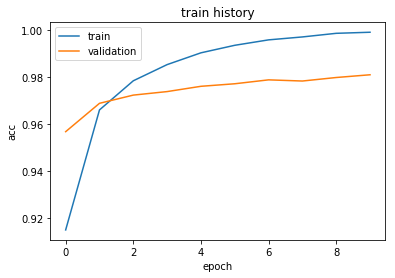

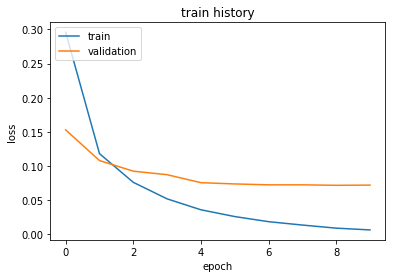

10000/10000 [==============================] - 1s 55us/step

accuracy= 0.9793


In [13]:
##将隐藏层的256个神经元改为1000个神经元

# 导入所需模块
from keras.utils import np_utils
import numpy as np
np.random.seed(10)
#读取MNIST数据
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()
#将features (数字图像特征值)使用reshape 转换
x_train=x_train_image.reshape(60000,784).astype('float32')
x_test=x_test_image.reshape(10000,784).astype('float32')
#标准化
x_train_normalize=x_train/255
x_test_normalize=x_test/255
#one_hot encoding转换
y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)
#导入所需模块
from keras.models import Sequential
from keras.layers import Dense

#建立Sequential
model=Sequential()
#建立“输入层”“隐藏层”
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
#建立“输出层”
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
#查看模型的摘要
print(model.summary())
#定义训练方式
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#开始训练
train_history=model.fit(x=x_train_normalize,y=y_train_onehot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
#建立show_train_history
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
#画出准确率执行结果
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

#评估模型准确率
scores=model.evaluate(x_test_normalize,y_test_onehot)
print()
print('accuracy=',scores[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_22 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_75 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.3576 - acc: 0.8935 - val_loss: 0.1618 - val_acc: 0.9546
Epoch 2/10
 - 5s - loss: 0.1603 - acc: 0.9527 - val_loss: 0.1222 - val_acc: 0.9653
Epoch 3/10
 - 5s - loss: 0.1172 - acc: 0.9656 - val_loss: 0.1012 - val_acc: 0.9713
Epoch 4/10
 - 5s - loss: 0.0944 - acc: 0.9719 - val_loss: 0.0901 - val_acc: 0.9730
Epoch 5/10
 -

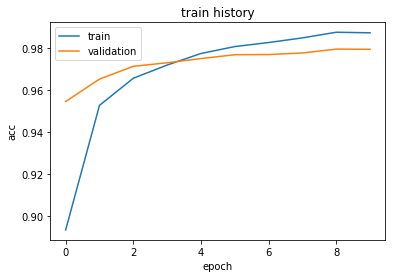

10000/10000 [==============================] - 1s 57us/step

accuracy= 0.981


In [48]:
##多层感知器加入DropOUT功能已避免过度拟合
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout  #导入dropout模块
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
model=Sequential()
#将输入层与隐藏层加入模型
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))   #加入Dropout功能
#将输出层加入模型
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
#查看模型的摘要
print(model.summary())
#定义训练方式
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#开始训练
train_history=model.fit(x=x_train_normalize,y=y_train_onehot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
#图示训练过程的准确率
show_train_history(train_history,'acc','val_acc')
#查看准确率
scores=model.evaluate(x_test_normalize,y_test_onehot)
print()
print('accuracy=',scores[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_35 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_95 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_36 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_96 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 12s - loss: 0.3693 - acc: 0.8855 - val_loss: 0.1346 - val_acc: 

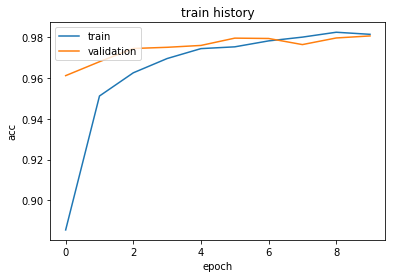

10000/10000 [==============================] - 1s 116us/step

accuracy= 0.9822


In [55]:
###建立多层感知器模型包含两个隐藏层
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout  #导入dropout模块
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
model=Sequential()
model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_train_normalize,y=y_train_onehot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
show_train_history(train_history,'acc','val_acc')
scores=model.evaluate(x_test_normalize,y_test_onehot)
print()
print('accuracy=',scores[1])